<a href="https://colab.research.google.com/github/pranavtyagi2/Data-Visualization-Project/blob/main/NETFLIX_DATA_VISUALISATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()








Saving netflix_titles.csv to netflix_titles.csv


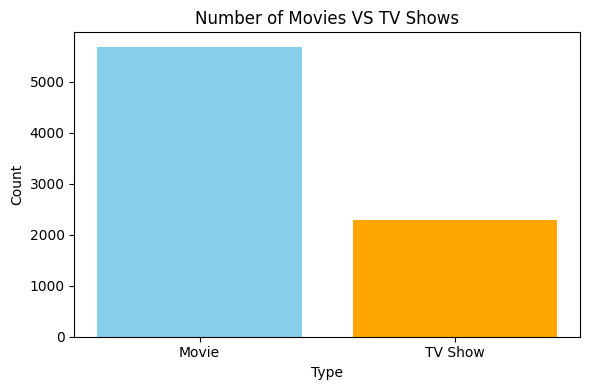

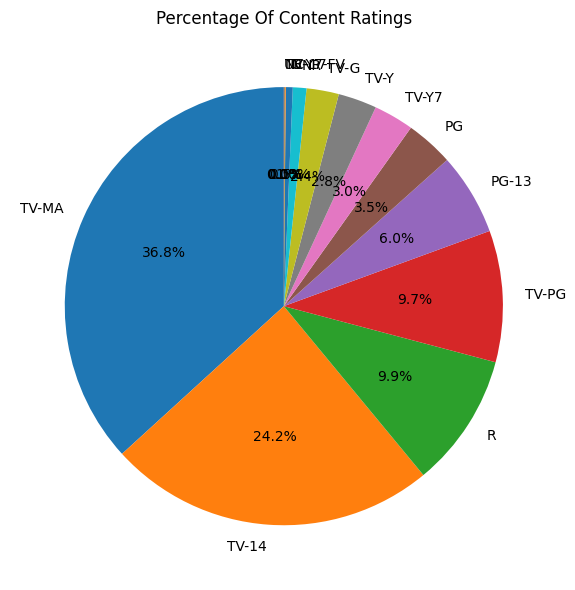

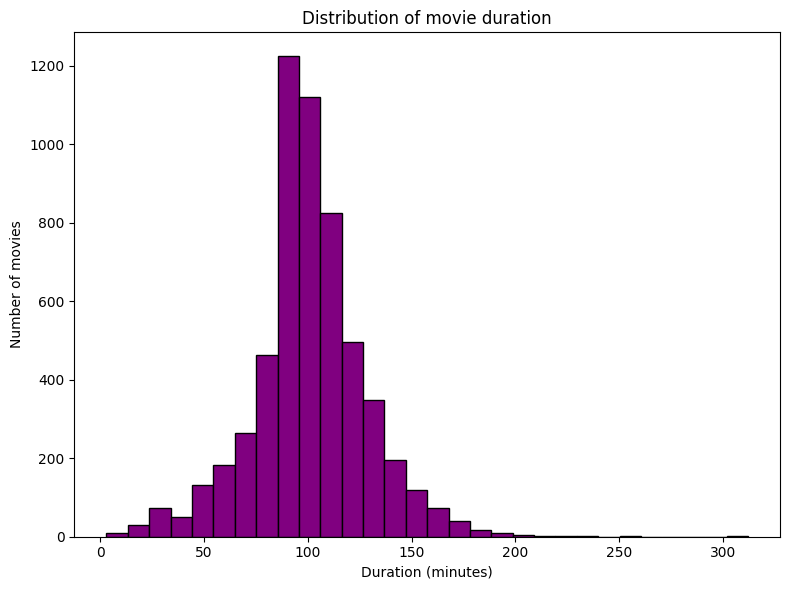

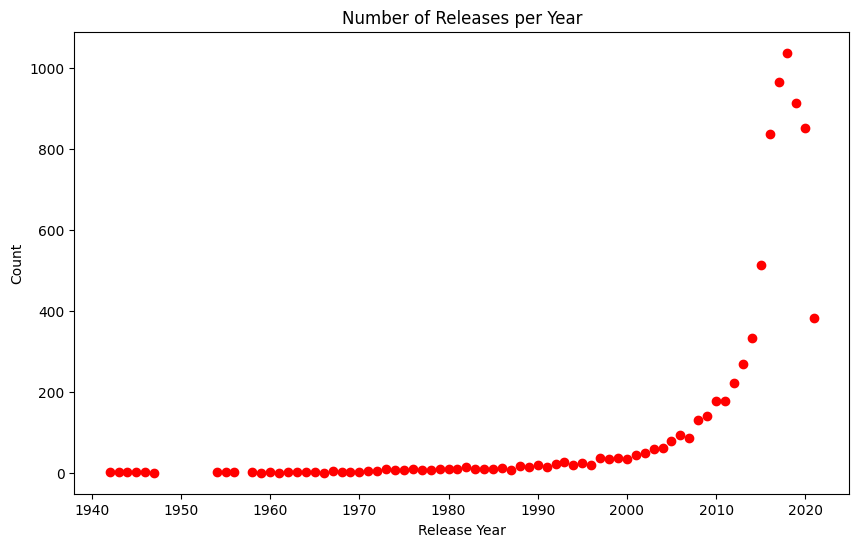

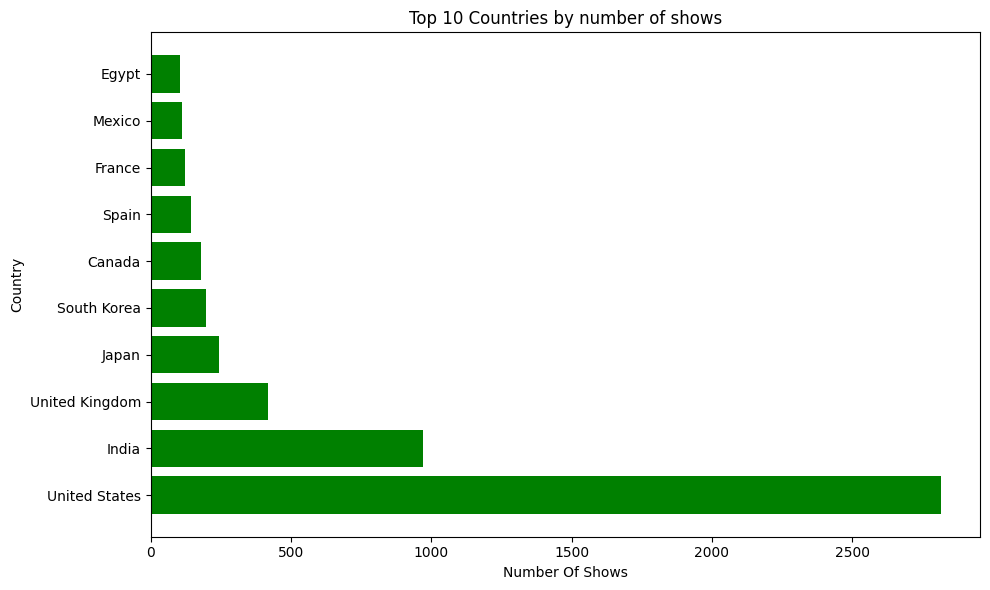

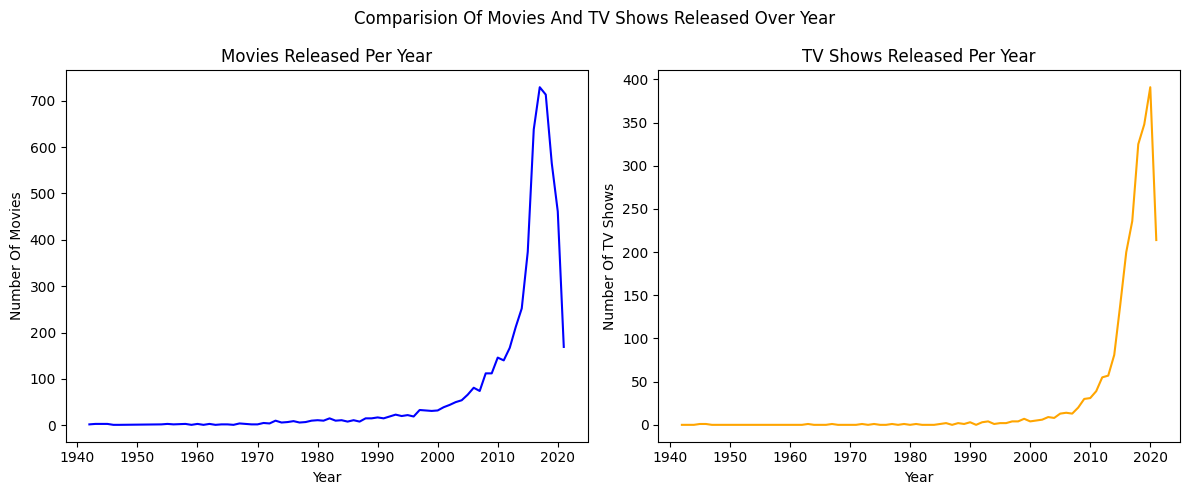

In [ ]:
#import the libraries
import pandas as pd
import matplotlib.pyplot as plt

#load the data
df = pd.read_csv('netflix_titles.csv')

#clean data
df = df.dropna(subset=['type','release_year','rating','country','duration'])



type_counts = df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values, color = ['skyblue','orange'])
plt.title('Number of Movies VS TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig("movies_vs_tvshows.png")

plt.show()

rating_counts = df['rating'].value_counts()
plt.figure(figsize = (8,6))
plt.pie(rating_counts , labels = rating_counts.index , autopct = '%1.1f%%', startangle = 90)
plt.title('Percentage Of Content Ratings')
plt.tight_layout()
plt.savefig("content_ratings_pie.png")

plt.show()

movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace('min','').astype(int)

plt.figure(figsize = (8,6))

plt.hist(movie_df['duration_int'], bins = 30, color = 'purple', edgecolor = 'black')
plt.title('Distribution of movie duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of movies')
plt.tight_layout()
plt.savefig("movie_duration_histogram.png")

release_counts = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.scatter(release_counts.index, release_counts.values, color='red')
plt.title('Number of Releases per Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.savefig("release_year_scatter.png")
plt.show()

country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(10,6))
plt.barh(country_counts.index, country_counts.values, color='green')
plt.title('Top 10 Countries by number of shows')
plt.xlabel('Number Of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig("top_10_countries.png")
plt.show()

content_by_year = df.groupby(['release_year','type']).size().unstack().fillna(0)

fig , ax = plt.subplots(1,2,figsize = (12,5))

# first subplot : Movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='blue')
ax[0].set_title('Movies Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number Of Movies')

# second subplot : TV Shows
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color='orange')
ax[1].set_title('TV Shows Released Per Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number Of TV Shows')

fig.suptitle('Comparision Of Movies And TV Shows Released Over Year')
plt.tight_layout()
plt.savefig('movies_tv_shows_comparision.png')
plt.show()
